In [1]:
# dependencies
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

# K-means

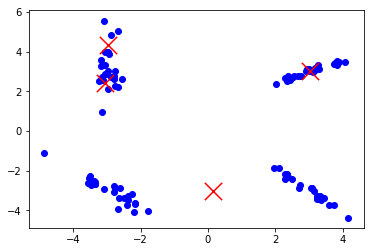

In [2]:
class K_Means:
    def __init__(self, k =3, tolerance = 0.0001, max_iterations = 500):
        self.k = k
        self.tolerance = tolerance
        self.max_iterations = max_iterations

    def fit(self, data):
        """ fit k-means to data """

        self.centroids = {}

        #initialize the centroids, the first 'k' elements in the dataset will be our initial centroids
        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iterations):
            self.classes = {}
            for i in range(self.k):
                self.classes[i] = []

            #find the distance between the point and cluster; choose the nearest centroid
            for features in data:
                distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
                classification = np.argmin(distances)
                self.classes[classification].append(features)

            previous = dict(self.centroids)

            #average the cluster datapoints to re-calculate the centroids
            for classification in self.classes:
                self.centroids[classification] = np.average(self.classes[classification], axis = 0)

            # check if centroids moved more than `tolerance`
            isOptimal = True
            for centroid in self.centroids:
                original_centroid = previous[centroid]
                curr = self.centroids[centroid]
                if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
                    isOptimal = False
            #break out of the main loop if the results are optimal, ie. the centroids don't change their positions much(more than our tolerance)
            if isOptimal:
                break

    def pred(self, data):
        """ Predict cluster for data """
        distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
    
    
# create dataset
X, _ = datasets.make_classification(n_samples=100, n_features=2,n_informative=2, n_redundant=0, n_classes=2, class_sep=3)

# fit kmeans with data
kmeans = K_Means(k=4)
kmeans.fit(X)

# plot centroids and data
plt.scatter(X[:,0], X[:,1], color='blue')
centroids = kmeans.centroids.values()
plt.scatter([c[0] for c in centroids], [c[1] for c in centroids], color='red', marker='x', s=300)
plt.show()
